In [2]:
import bokeh
import ujson as json
import gzip
from collections import defaultdict
from sklearn import base
from sklearn.pipeline import Pipeline
from pandas import Series
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np

In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import json
from shapely.geometry import LineString, Point

In [ ]:
from bokeh.io import show
from bokeh.models import LogColorMapper
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure
from bokeh.sampledata.unemployment import data as unemployment
from bokeh.sampledata.us_counties import data as counties

palette = tuple(reversed(palette))

counties = {
    code: county for code, county in counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
)

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Texas Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None,
    tooltips=[
        ("Name", "@name"), ("Unemployment rate", "@rate%"), ("(Long, Lat)", "($x, $y)")
    ])
p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source=data,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

show(p)

In [4]:
import pandas as pd
import numpy as np
import ast
from datetime import datetime


data = pd.read_csv('data/Porto_taxi_data_test_partial_trajectories.csv')
#data = pd.read_csv('data/train.csv')

df = data['POLYLINE'].apply(lambda s: ast.literal_eval(s))

data['POLYLINE'] = df
data['start'] = data['POLYLINE'].apply(lambda s: s[0])
data['end'] = data['POLYLINE'].apply(lambda s: s[-1])

data['date'] = data['TIMESTAMP'].apply(lambda s: datetime.fromtimestamp(int(s)))


data.tail()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,start,end,date
315,T323,A,70885.0,NaN,20000430,1419171485,A,False,"[[-8.570196, 41.159484], [-8.570187, 41.158962...","[-8.570196, 41.159484]","[-8.593308, 41.151050999999995]",2014-12-21 09:18:05
316,T324,B,NaN,53.0,20000020,1419170802,A,False,"[[-8.613873, 41.14123200000001], [-8.613882, 4...","[-8.613873, 41.14123200000001]","[-8.629785, 41.152671]",2014-12-21 09:06:42
317,T325,C,NaN,NaN,20000207,1419172121,A,False,"[[-8.648100000000001, 41.152536], [-8.647461, ...","[-8.648100000000001, 41.152536]","[-8.643303000000001, 41.154327]",2014-12-21 09:28:41
318,T326,A,76232.0,NaN,20000667,1419171980,A,False,"[[-8.571699, 41.156073000000006], [-8.57058300...","[-8.571699, 41.156073000000006]","[-8.569206, 41.167629]",2014-12-21 09:26:20
319,T327,A,31208.0,NaN,20000255,1419171420,A,False,"[[-8.574561000000001, 41.180184], [-8.572248, ...","[-8.574561000000001, 41.180184]","[-8.592345000000002, 41.192243999999995]",2014-12-21 09:17:00


In [7]:
# markov model can be used to model this process
# every thirty minutes, we estimate what is the best move next.
# taxi, trip, location, 

In [9]:
import json
from shapely.geometry import LineString, Point

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15,8]
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
#data['POLYLINE'].plot(figsize=[15,15]);
df = pd.read_csv('data/Porto_taxi_data_test_partial_trajectories.csv', nrows=1000)
df['traj'] = json.loads('[' + df.POLYLINE.str.cat(sep=',') + ']')
df.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,traj
0,T1,B,NaN,15.0,20000542,1408039037,A,False,"[[-8.585676, 41.148522], [-8.585712000000001, ...","[[-8.585676, 41.148522], [-8.585712000000001, ..."
1,T2,B,NaN,57.0,20000108,1408038611,A,False,"[[-8.610876000000001, 41.14557], [-8.610858, 4...","[[-8.610876000000001, 41.14557], [-8.610858, 4..."
2,T3,B,NaN,15.0,20000370,1408038568,A,False,"[[-8.585739, 41.148558], [-8.585730000000002, ...","[[-8.585739, 41.148558], [-8.585730000000002, ..."
3,T4,B,NaN,53.0,20000492,1408039090,A,False,"[[-8.613963, 41.141169], [-8.614125000000001, ...","[[-8.613963, 41.141169], [-8.614125000000001, ..."
4,T5,B,NaN,18.0,20000621,1408039177,A,False,"[[-8.619902999999999, 41.148036000000005], [-8...","[[-8.619902999999999, 41.148036000000005], [-8..."


In [10]:
df = df[df.traj.str.len() > 1].copy()
df['lines'] = gpd.GeoSeries(df.traj.apply(LineString))
df = gpd.GeoDataFrame(df, geometry='lines')
df.head()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,traj,lines
0,T1,B,NaN,15.0,20000542,1408039037,A,False,"[[-8.585676, 41.148522], [-8.585712000000001, ...","[[-8.585676, 41.148522], [-8.585712000000001, ...","LINESTRING (-8.58568 41.14852, -8.58571 41.148..."
1,T2,B,NaN,57.0,20000108,1408038611,A,False,"[[-8.610876000000001, 41.14557], [-8.610858, 4...","[[-8.610876000000001, 41.14557], [-8.610858, 4...","LINESTRING (-8.61088 41.14557, -8.61086 41.145..."
2,T3,B,NaN,15.0,20000370,1408038568,A,False,"[[-8.585739, 41.148558], [-8.585730000000002, ...","[[-8.585739, 41.148558], [-8.585730000000002, ...","LINESTRING (-8.58574 41.14856, -8.58573 41.148..."
3,T4,B,NaN,53.0,20000492,1408039090,A,False,"[[-8.613963, 41.141169], [-8.614125000000001, ...","[[-8.613963, 41.141169], [-8.614125000000001, ...","LINESTRING (-8.61396 41.14117, -8.61413 41.141..."
4,T5,B,NaN,18.0,20000621,1408039177,A,False,"[[-8.619902999999999, 41.148036000000005], [-8...","[[-8.619902999999999, 41.148036000000005], [-8...","LINESTRING (-8.61990 41.14804, -8.61989 41.14804)"


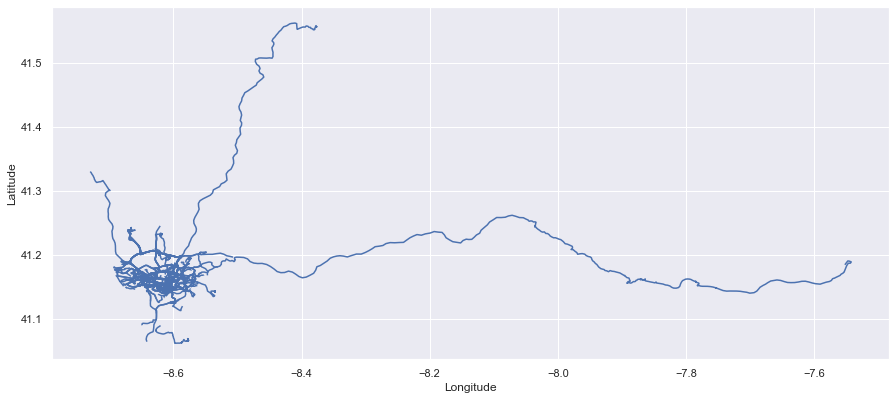

In [11]:
df.lines.plot(figsize=[15,15]);   
plt.xlabel('Longitude')
plt.ylabel('Latitude');

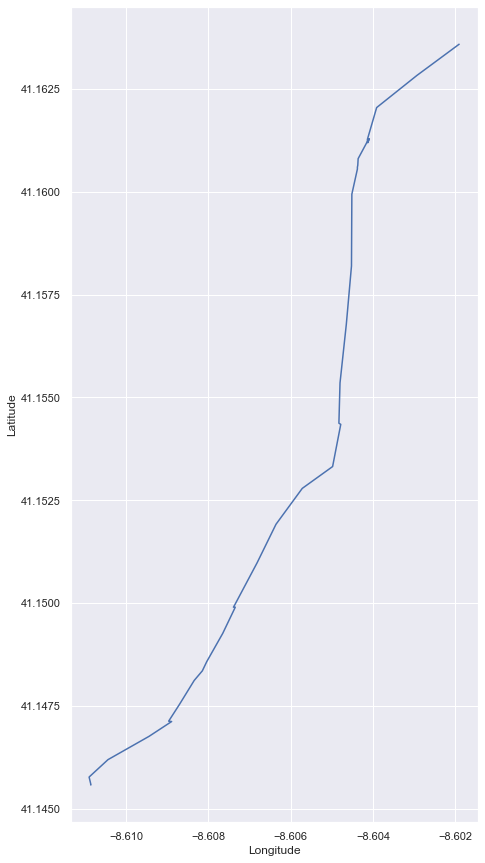

In [12]:
df.iloc[[1]].lines.plot(figsize=[15,15], marker = 'o');
plt.xlabel('Longitude')
plt.ylabel('Latitude');


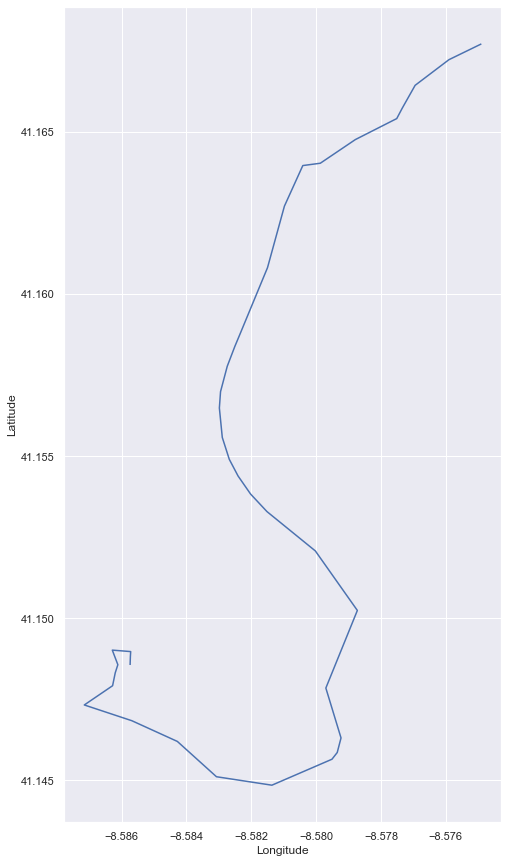

In [13]:
df.iloc[[2]].lines.plot(figsize=[15,15]);
plt.xlabel('Longitude')
plt.ylabel('Latitude');

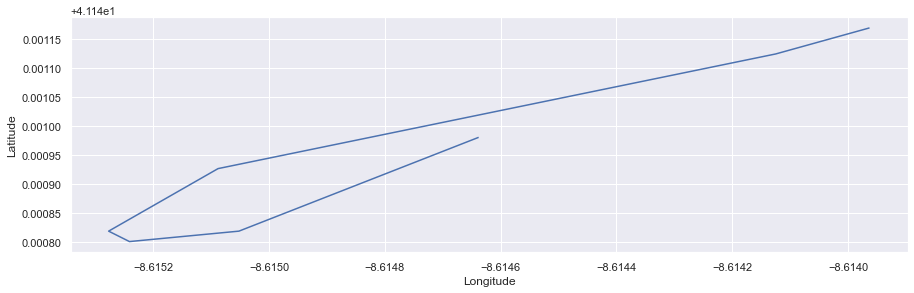

In [14]:
df.iloc[[3]].lines.plot(figsize=[15,15]);
plt.xlabel('Longitude')
plt.ylabel('Latitude');

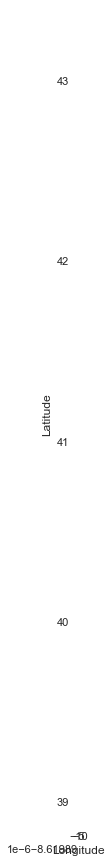

In [15]:
df.iloc[[4]].lines.plot(figsize=[15,15]);
plt.xlabel('Longitude')
plt.ylabel('Latitude');

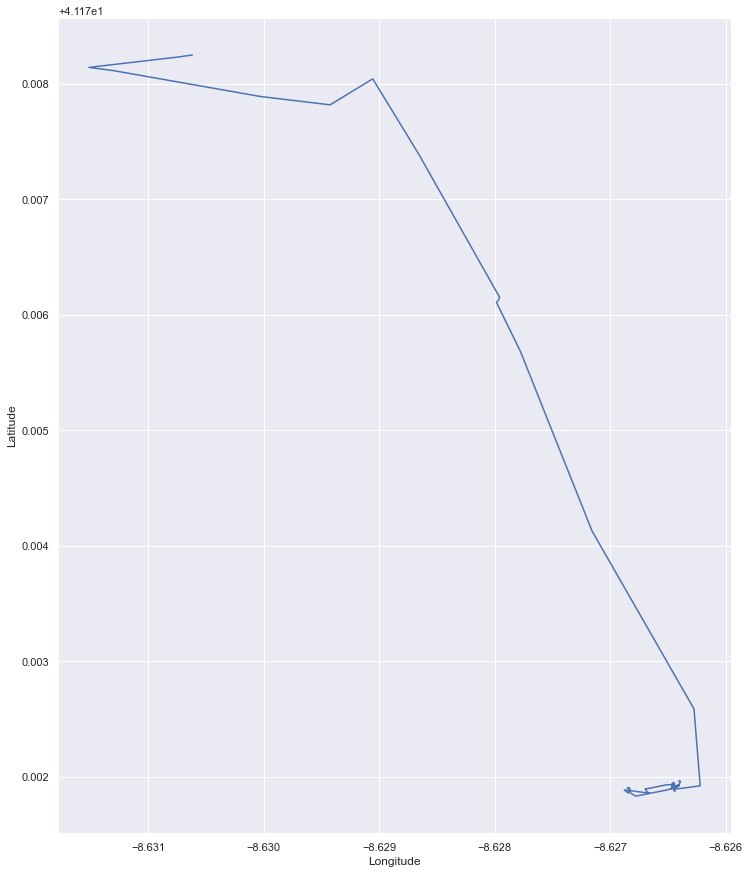

In [16]:
df.iloc[[5]].lines.plot(figsize=[15,15]);
plt.xlabel('Longitude')
plt.ylabel('Latitude');

In [59]:


class StateTransformer(base.BaseEstimator, base.TransformerMixin):
    def __init__(self):
        self.results = []
       
        
    def fit(self, X, y=None):
        
        return self
    
    def predict(self, X, y=None):
        
        return self
  
    def transform(self, X):
        df_stands = pd.DataFrame(np.array(X))
        print(df_stands.shape)
        df_stands['count'] = df_stands[0].apply(lambda s: len(s))
        maxNumStands = df_stands['count'].max()
        
        df_stands['dict'] = df_stands[0].apply(lambda s: [str(s[i][0])+','+str(s[i][1]) for i in range(len(s))])
        df_category = pd.DataFrame.from_dict(list(df_stands['dict']))
        for label, content in df_category.items():
            df_category[label] = df_category[label].apply(lambda s: str(s).split(',') if s else None)
        
        df_category['start'] = df_stands[0].apply(lambda s: s[0])
        df_category['end'] = df_stands[0].apply(lambda s: s[-1])
        
        return df_category

In [60]:

model_state = StateTransformer()
model_state.fit(data['POLYLINE'])
stand_state = model_state.transform(data['POLYLINE'])

(320, 1)


In [61]:
stand_state.shape, data.shape    

((320, 614), (320, 12))

In [62]:
type(stand_state[0][0])

list

In [63]:
stand_state.head() 

,0,1,2,3,4,5,6,7,8,9,...,604,605,606,607,608,609,610,611,start,end
0,"[-8.585676, 41.148522]","[-8.585712000000001, 41.148638999999996]","[-8.585685000000002, 41.148855000000005]","[-8.585730000000002, 41.14892699999999]","[-8.585982, 41.148962999999995]","[-8.586396, 41.148954]","[-8.586072, 41.14872]","[-8.586324000000001, 41.147847]","[-8.586999, 41.147459999999995]","[-8.586575999999999, 41.14715400000001]",...,None,None,None,None,None,None,None,None,"[-8.585676, 41.148522]","[-8.584883999999999, 41.146623000000005]"
1,"[-8.610876000000001, 41.14557]","[-8.610858, 41.145579000000005]","[-8.610903, 41.145768]","[-8.610444, 41.146190999999995]","[-8.609445000000001, 41.146758]","[-8.608896, 41.147118]","[-8.608968, 41.147127]","[-8.608707, 41.147532000000005]","[-8.608347, 41.148117000000006]","[-8.608149, 41.148351000000005]",...,None,None,None,None,None,None,None,None,"[-8.610876000000001, 41.14557]","[-8.601894, 41.163597]"
2,"[-8.585739, 41.148558]","[-8.585730000000002, 41.148828]","[-8.585721, 41.14897200000001]","[-8.586288, 41.14901700000001]","[-8.586117, 41.14856699999999]","[-8.586198, 41.148315000000004]","[-8.586279000000001, 41.147918999999995]","[-8.587152, 41.147324999999995]","[-8.585685000000002, 41.146839]","[-8.584281, 41.14620000000001]",...,None,None,None,None,None,None,None,None,"[-8.585739, 41.148558]","[-8.574903, 41.167719]"
3,"[-8.613963, 41.141169]","[-8.614125000000001, 41.141124000000005]","[-8.615088, 41.140926]","[-8.615276999999999, 41.140818]","[-8.615259, 41.140809000000004]","[-8.615241000000001, 41.1408]","[-8.615052, 41.140818]","[-8.614638, 41.14097999999999]",None,None,...,None,None,None,None,None,None,None,None,"[-8.613963, 41.141169]","[-8.614638, 41.14097999999999]"
4,"[-8.619902999999999, 41.148036000000005]","[-8.619894, 41.148036000000005]",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,"[-8.619902999999999, 41.148036000000005]","[-8.619894, 41.148036000000005]"


In [68]:
threshold = 20
stand_state_short = stand_state.copy()
stand_state_short = stand_state_short.drop(columns=['start','end'])
totalcols = stand_state_short.shape[1]
cols = np.array(range(totalcols-threshold))
cols = cols + threshold
stand_state_short = stand_state_short.drop(columns=cols)
stand_state_short.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,"[-8.585676, 41.148522]","[-8.585712000000001, 41.148638999999996]","[-8.585685000000002, 41.148855000000005]","[-8.585730000000002, 41.14892699999999]","[-8.585982, 41.148962999999995]","[-8.586396, 41.148954]","[-8.586072, 41.14872]","[-8.586324000000001, 41.147847]","[-8.586999, 41.147459999999995]","[-8.586575999999999, 41.14715400000001]","[-8.584883999999999, 41.146623000000005]",None,None,None,None,None,None,None,None,None
1,"[-8.610876000000001, 41.14557]","[-8.610858, 41.145579000000005]","[-8.610903, 41.145768]","[-8.610444, 41.146190999999995]","[-8.609445000000001, 41.146758]","[-8.608896, 41.147118]","[-8.608968, 41.147127]","[-8.608707, 41.147532000000005]","[-8.608347, 41.148117000000006]","[-8.608149, 41.148351000000005]","[-8.608041, 41.148576000000006]","[-8.607654, 41.14926]","[-8.607348000000002, 41.149899000000005]","[-8.607393, 41.149899000000005]","[-8.607357, 41.149962]","[-8.606817, 41.150979]","[-8.606358, 41.151914999999995]","[-8.605719, 41.152788]","[-8.604981, 41.153318999999996]","[-8.604783, 41.154345]"
2,"[-8.585739, 41.148558]","[-8.585730000000002, 41.148828]","[-8.585721, 41.14897200000001]","[-8.586288, 41.14901700000001]","[-8.586117, 41.14856699999999]","[-8.586198, 41.148315000000004]","[-8.586279000000001, 41.147918999999995]","[-8.587152, 41.147324999999995]","[-8.585685000000002, 41.146839]","[-8.584281, 41.14620000000001]","[-8.583075000000001, 41.145111]","[-8.581365, 41.144850000000005]","[-8.579511, 41.145651]","[-8.579348999999999, 41.145858000000004]","[-8.579232, 41.146308]","[-8.5797, 41.147847]","[-8.578728, 41.150241]","[-8.580024, 41.152077]","[-8.581517999999999, 41.153292]","[-8.582022, 41.153832]"
3,"[-8.613963, 41.141169]","[-8.614125000000001, 41.141124000000005]","[-8.615088, 41.140926]","[-8.615276999999999, 41.140818]","[-8.615259, 41.140809000000004]","[-8.615241000000001, 41.1408]","[-8.615052, 41.140818]","[-8.614638, 41.14097999999999]",None,None,None,None,None,None,None,None,None,None,None,None
4,"[-8.619902999999999, 41.148036000000005]","[-8.619894, 41.148036000000005]",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [69]:
allpositions = []
for arow in stand_state_short.iterrows():
    arow = list(arow[1])
    arow = list(filter(None, arow)) 
    print(arow)
    allpositions.extend([(round(float(pos[0]), 6),round(float(pos[1]),6)) for pos in arow])
    
allpositions[:2]

[['-8.585676', '41.148522'], ['-8.585712000000001', '41.148638999999996'], ['-8.585685000000002', '41.148855000000005'], ['-8.585730000000002', '41.14892699999999'], ['-8.585982', '41.148962999999995'], ['-8.586396', '41.148954'], ['-8.586072', '41.14872'], ['-8.586324000000001', '41.147847'], ['-8.586999', '41.147459999999995'], ['-8.586575999999999', '41.14715400000001'], ['-8.584883999999999', '41.146623000000005']]
[['-8.610876000000001', '41.14557'], ['-8.610858', '41.145579000000005'], ['-8.610903', '41.145768'], ['-8.610444', '41.146190999999995'], ['-8.609445000000001', '41.146758'], ['-8.608896', '41.147118'], ['-8.608968', '41.147127'], ['-8.608707', '41.147532000000005'], ['-8.608347', '41.148117000000006'], ['-8.608149', '41.148351000000005'], ['-8.608041', '41.148576000000006'], ['-8.607654', '41.14926'], ['-8.607348000000002', '41.149899000000005'], ['-8.607393', '41.149899000000005'], ['-8.607357', '41.149962'], ['-8.606817', '41.150979'], ['-8.606358', '41.1519149999999

[(-8.585676, 41.148522), (-8.585712, 41.148639)]

In [70]:
from collections import Counter

In [71]:
allpositions_count = Counter(allpositions)


In [72]:
len(allpositions_count)

5229

In [73]:
test = allpositions_count
total = sum(test.values())
values = list(test.values())
values = [ 1.0*value/total for value in values]
values[:2]

[0.00018850141376060322, 0.00018850141376060322]

In [74]:
states_distribution = stand_state_short.copy()
distributions = []
for arow in states_distribution.iterrows():
    arow = list(arow[1])
    arow = list(filter(None, arow)) 
    alist= []
    alist.extend([(round(float(pos[0]), 6),round(float(pos[1]),6)) for pos in arow])
    
    distribute = Counter(alist)
    total = sum(distribute.values())
    prob = [1.0*value/total for value in distribute.values()]
    d = dict(zip(distribute.keys(), prob))
    distributions.append(d)


In [75]:
len(distributions),len(stand_state_short),data.shape

(320, 320, (320, 12))

In [76]:
matrix_state = []
index = np.array(range(len(allpositions_count)))
for astate in distributions:
    alist = [astate[pos] if pos in astate else 0 for pos in allpositions_count.keys()]
    state_dict = dict(zip(index, alist))
    matrix_state.append(state_dict)
    


In [77]:
import math
matrix_transition = []
fare_fee = 2.0
gas_fee = 2.0
for astate in stand_state_short.iterrows():
    astate = list(astate[1])
    astate = list(filter(None, astate)) 
    alist = []
    for bstate in stand_state.iterrows():
        bstate = list(bstate[1])
        bstate = list(filter(None, bstate))
        if len(astate) - len(bstate) >0:
            end = bstate[-1]
            [bstate.append(end) for i in range(len(astate) - len(bstate))]
        else:
            end = astate[-1]
            [astate.append(end) for i in range(len(bstate) - len(astate))]
        dist = [math.sqrt((round(float(astate[i][0]), 6) - round(float(bstate[i][0]), 6))**2 + (round(float(astate[i][1]), 6) - round(float(bstate[i][1]), 6))**2)  for i in range(len(astate)) ]
        avg_dist = sum(dist)/len(dist)
        alist.append(avg_dist)
    totaldistance = sum(alist)
    alist = [(1-adist/totaldistance)/(len(alist)-1) for adist in alist]
    matrix_transition.append(alist)
matrix_transition[:2]

[[0.003134761905213687,
  0.0031297216876304754,
  0.0031327262355677547,
  0.003128263877835788,
  0.003127260105538864,
  0.0031241328298930874,
  0.0031332686361683474,
  0.003126338852960948,
  0.0031288754619677533,
  0.003128066750073688,
  0.003130213950330321,
  0.0031323918059410084,
  0.0031322711220332982,
  0.0031086057159426506,
  0.0031279989554407308,
  0.0031194621437110777,
  0.0031249685750889527,
  0.0031269994058935892,
  0.0031313706308811495,
  0.0031211071744762287,
  0.0031343206973103435,
  0.003128565813971864,
  0.0031251185432115886,
  0.0031343705122602,
  0.0031226512174831744,
  0.003127366232548446,
  0.003130883752523436,
  0.00313411709478925,
  0.0031282789410807164,
  0.0031317462412056877,
  0.003131661413770528,
  0.0031291254967831007,
  0.003125355581029636,
  0.003127664989165817,
  0.0031287352419011884,
  0.0031237896050673617,
  0.0031131770968035747,
  0.003125050077478172,
  0.0031343541670289772,
  0.0031279982334399144,
  0.00312688702645

In [78]:
from pomegranate import *
dists = [DiscreteDistribution(astate) for astate in matrix_state]
trans_mat = numpy.array(matrix_transition)
n = len(dists)
inits = np.array([1.0/n]*n)

starts = inits
ends = inits
model = HiddenMarkovModel.from_matrix(trans_mat, dists, starts, ends)

In [79]:
import dill
dill.dump(model, open('taxi_passenger_demand_model.pkg','wb'))

# Test the model and query trips

In [82]:
df.shape

(318, 11)

In [85]:
stand_state_short.shape

(320, 20)

In [88]:
position_counts = []
trips = stand_state_short.copy()
for row in trips.iterrows():
    row = list(filter(None,list(row[1])))
    position_counts.append(len(row))
trips['count'] = position_counts
trips = trips[trips['count']>1]

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,count
0,"[-8.585676, 41.148522]","[-8.585712000000001, 41.148638999999996]","[-8.585685000000002, 41.148855000000005]","[-8.585730000000002, 41.14892699999999]","[-8.585982, 41.148962999999995]","[-8.586396, 41.148954]","[-8.586072, 41.14872]","[-8.586324000000001, 41.147847]","[-8.586999, 41.147459999999995]","[-8.586575999999999, 41.14715400000001]",...,None,None,None,None,None,None,None,None,None,11
1,"[-8.610876000000001, 41.14557]","[-8.610858, 41.145579000000005]","[-8.610903, 41.145768]","[-8.610444, 41.146190999999995]","[-8.609445000000001, 41.146758]","[-8.608896, 41.147118]","[-8.608968, 41.147127]","[-8.608707, 41.147532000000005]","[-8.608347, 41.148117000000006]","[-8.608149, 41.148351000000005]",...,"[-8.607654, 41.14926]","[-8.607348000000002, 41.149899000000005]","[-8.607393, 41.149899000000005]","[-8.607357, 41.149962]","[-8.606817, 41.150979]","[-8.606358, 41.151914999999995]","[-8.605719, 41.152788]","[-8.604981, 41.153318999999996]","[-8.604783, 41.154345]",20
2,"[-8.585739, 41.148558]","[-8.585730000000002, 41.148828]","[-8.585721, 41.14897200000001]","[-8.586288, 41.14901700000001]","[-8.586117, 41.14856699999999]","[-8.586198, 41.148315000000004]","[-8.586279000000001, 41.147918999999995]","[-8.587152, 41.147324999999995]","[-8.585685000000002, 41.146839]","[-8.584281, 41.14620000000001]",...,"[-8.581365, 41.144850000000005]","[-8.579511, 41.145651]","[-8.579348999999999, 41.145858000000004]","[-8.579232, 41.146308]","[-8.5797, 41.147847]","[-8.578728, 41.150241]","[-8.580024, 41.152077]","[-8.581517999999999, 41.153292]","[-8.582022, 41.153832]",20
3,"[-8.613963, 41.141169]","[-8.614125000000001, 41.141124000000005]","[-8.615088, 41.140926]","[-8.615276999999999, 41.140818]","[-8.615259, 41.140809000000004]","[-8.615241000000001, 41.1408]","[-8.615052, 41.140818]","[-8.614638, 41.14097999999999]",None,None,...,None,None,None,None,None,None,None,None,None,8
4,"[-8.619902999999999, 41.148036000000005]","[-8.619894, 41.148036000000005]",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,2


In [91]:
trips = trips.reset_index()
trips.head()

,index,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,count
0,0,"[-8.585676, 41.148522]","[-8.585712000000001, 41.148638999999996]","[-8.585685000000002, 41.148855000000005]","[-8.585730000000002, 41.14892699999999]","[-8.585982, 41.148962999999995]","[-8.586396, 41.148954]","[-8.586072, 41.14872]","[-8.586324000000001, 41.147847]","[-8.586999, 41.147459999999995]",...,None,None,None,None,None,None,None,None,None,11
1,1,"[-8.610876000000001, 41.14557]","[-8.610858, 41.145579000000005]","[-8.610903, 41.145768]","[-8.610444, 41.146190999999995]","[-8.609445000000001, 41.146758]","[-8.608896, 41.147118]","[-8.608968, 41.147127]","[-8.608707, 41.147532000000005]","[-8.608347, 41.148117000000006]",...,"[-8.607654, 41.14926]","[-8.607348000000002, 41.149899000000005]","[-8.607393, 41.149899000000005]","[-8.607357, 41.149962]","[-8.606817, 41.150979]","[-8.606358, 41.151914999999995]","[-8.605719, 41.152788]","[-8.604981, 41.153318999999996]","[-8.604783, 41.154345]",20
2,2,"[-8.585739, 41.148558]","[-8.585730000000002, 41.148828]","[-8.585721, 41.14897200000001]","[-8.586288, 41.14901700000001]","[-8.586117, 41.14856699999999]","[-8.586198, 41.148315000000004]","[-8.586279000000001, 41.147918999999995]","[-8.587152, 41.147324999999995]","[-8.585685000000002, 41.146839]",...,"[-8.581365, 41.144850000000005]","[-8.579511, 41.145651]","[-8.579348999999999, 41.145858000000004]","[-8.579232, 41.146308]","[-8.5797, 41.147847]","[-8.578728, 41.150241]","[-8.580024, 41.152077]","[-8.581517999999999, 41.153292]","[-8.582022, 41.153832]",20
3,3,"[-8.613963, 41.141169]","[-8.614125000000001, 41.141124000000005]","[-8.615088, 41.140926]","[-8.615276999999999, 41.140818]","[-8.615259, 41.140809000000004]","[-8.615241000000001, 41.1408]","[-8.615052, 41.140818]","[-8.614638, 41.14097999999999]",None,...,None,None,None,None,None,None,None,None,None,8
4,4,"[-8.619902999999999, 41.148036000000005]","[-8.619894, 41.148036000000005]",None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,2


In [97]:
trips.tail()

,index,0,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,19,count
313,315,"[-8.570196, 41.159484]","[-8.570187, 41.158962]","[-8.569467000000001, 41.159088]","[-8.567334, 41.160609]","[-8.566794000000002, 41.162814]","[-8.567226, 41.164497]","[-8.567964000000002, 41.165973]","[-8.56845, 41.166287999999994]","[-8.566362, 41.166468]",...,"[-8.565570000000001, 41.169104999999995]","[-8.566298999999999, 41.170428]","[-8.566956000000001, 41.171751]","[-8.567487, 41.17311]","[-8.567568, 41.173461]","[-8.56755, 41.17347]","[-8.567631, 41.173649999999995]","[-8.567649000000001, 41.173055999999995]","[-8.56755, 41.171247]",20
314,316,"[-8.613873, 41.14123200000001]","[-8.613882, 41.141241]","[-8.614719000000001, 41.141097]","[-8.615835, 41.140674]","[-8.61705, 41.140899000000005]","[-8.618859, 41.14174500000001]","[-8.620218, 41.142528000000006]","[-8.621109, 41.143329]","[-8.621730000000001, 41.143626]",...,"[-8.627859, 41.144706]","[-8.630073, 41.145236999999995]","[-8.63208, 41.146614]","[-8.632386, 41.14752300000001]","[-8.630775, 41.149395000000005]","[-8.629344000000001, 41.150997000000004]","[-8.629164, 41.151141]","[-8.629173, 41.15115]","[-8.629029000000001, 41.151455999999996]",20
315,317,"[-8.648100000000001, 41.152536]","[-8.647461, 41.15241]","[-8.646876, 41.153139]","[-8.645931, 41.153823]","[-8.645337, 41.154354000000005]","[-8.643303000000001, 41.154327]",None,None,None,...,None,None,None,None,None,None,None,None,None,6
316,318,"[-8.571699, 41.156073000000006]","[-8.570583000000001, 41.15592900000001]","[-8.568999, 41.15547900000001]","[-8.570061, 41.156055]","[-8.571681, 41.156226]","[-8.571249, 41.156604]","[-8.570241, 41.157351]","[-8.568548999999999, 41.158107]","[-8.566722, 41.158476]",...,"[-8.565336, 41.163102]","[-8.565804, 41.164730999999996]","[-8.566686, 41.166702]","[-8.569206, 41.167629]",None,None,None,None,None,15
317,319,"[-8.574561000000001, 41.180184]","[-8.572248, 41.179950000000005]","[-8.570493, 41.179491]","[-8.568828, 41.180553]","[-8.567244, 41.181624]","[-8.5653, 41.181048000000004]","[-8.562735, 41.181417]","[-8.560341, 41.18202]","[-8.558802, 41.18346]",...,"[-8.557515, 41.184954]","[-8.557812, 41.186169]","[-8.558235, 41.187267000000006]","[-8.55828, 41.18866200000001]","[-8.55828, 41.189643000000004]","[-8.559504, 41.190822000000004]","[-8.560233, 41.192568]","[-8.560502999999999, 41.195232]","[-8.560242, 41.198013]",20


In [96]:
df.tail()

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,traj,lines
315,T323,A,70885.0,NaN,20000430,1419171485,A,False,"[[-8.570196, 41.159484], [-8.570187, 41.158962...","[[-8.570196, 41.159484], [-8.570187, 41.158962...","LINESTRING (-8.57020 41.15948, -8.57019 41.158..."
316,T324,B,NaN,53.0,20000020,1419170802,A,False,"[[-8.613873, 41.14123200000001], [-8.613882, 4...","[[-8.613873, 41.14123200000001], [-8.613882, 4...","LINESTRING (-8.61387 41.14123, -8.61388 41.141..."
317,T325,C,NaN,NaN,20000207,1419172121,A,False,"[[-8.648100000000001, 41.152536], [-8.647461, ...","[[-8.648100000000001, 41.152536], [-8.647461, ...","LINESTRING (-8.64810 41.15254, -8.64746 41.152..."
318,T326,A,76232.0,NaN,20000667,1419171980,A,False,"[[-8.571699, 41.156073000000006], [-8.57058300...","[[-8.571699, 41.156073000000006], [-8.57058300...","LINESTRING (-8.57170 41.15607, -8.57058 41.155..."
319,T327,A,31208.0,NaN,20000255,1419171420,A,False,"[[-8.574561000000001, 41.180184], [-8.572248, ...","[[-8.574561000000001, 41.180184], [-8.572248, ...","LINESTRING (-8.57456 41.18018, -8.57225 41.179..."


In [101]:
positions = pd.DataFrame(allpositions_count.keys())
positions[0].max(), positions[1].max(), positions[0].min(), positions[1].min()

(-8.519121, 41.238684, -8.689302, 41.077008)

In [116]:
#-8.177093999999999, 41.231807999999994
positions[(positions[0]==-8.639118) & (positions[1]==41.162679)],positions[(positions[0]==-8.639118)]

(             0          1
 1718 -8.639118  41.162679,
              0          1
 1718 -8.639118  41.162679
 2111 -8.639118  41.153184)

In [130]:
positions.iloc[1718]

0    -8.639118
1    41.162679
Name: 1718, dtype: float64

In [140]:
atrip = [1718,2111,1515,1221,1428,1518]
long_lati = []
for i in atrip:
    long_lati.append(list(positions.iloc[i]))
long_lati

[[-8.639118, 41.162679],
 [-8.639118, 41.153184],
 [-8.609373, 41.155839],
 [-8.655336, 41.172849],
 [-8.610282, 41.150322],
 [-8.613225, 41.15439]]

In [146]:
df_trips = pd.DataFrame([0])
df_trips['traj']=[long_lati]

df_trips['lines'] = gpd.GeoSeries(df_trips.traj.apply(LineString))
df_trips = gpd.GeoDataFrame(df_trips, geometry='lines')
df_trips.head()

,0,traj,lines
0,0,"[[-8.639118, 41.162679], [-8.639118, 41.153184...","LINESTRING (-8.63912 41.16268, -8.63912 41.153..."


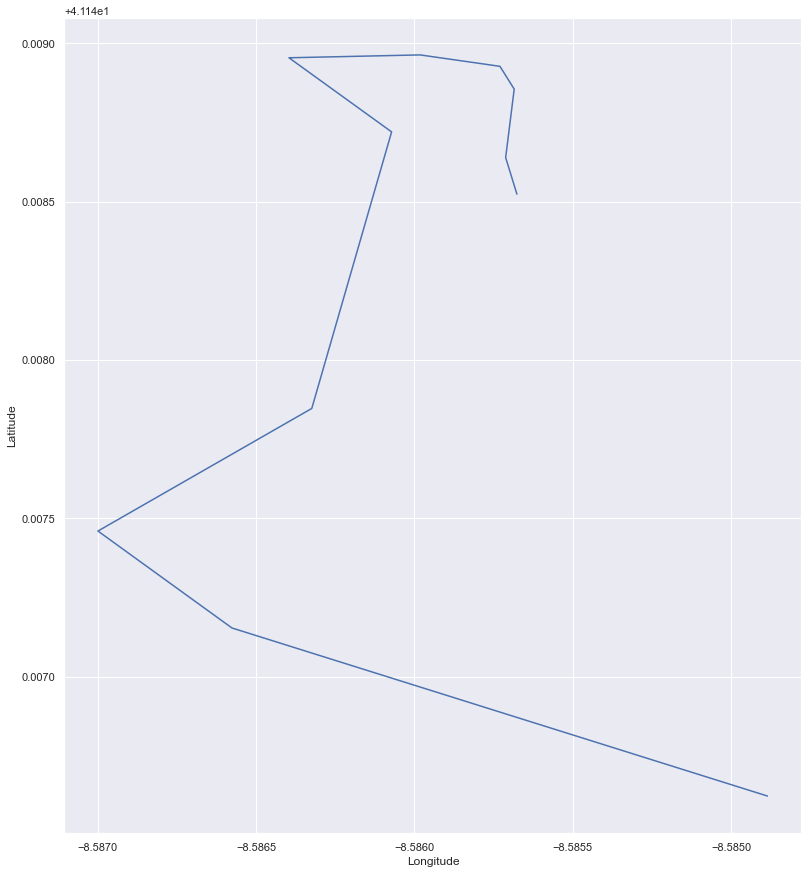

In [147]:
df.iloc[[0]].lines.plot(figsize=[15,15]);
plt.xlabel('Longitude')
plt.ylabel('Latitude');

In [118]:
print(model.log_probability(atrip))
print(", ".join(state.name for i, state in model.viterbi(atrip)[1]))

-58.37489592743864
None-start, s102, s127, s90, s74, s86, s91, None-end


In [119]:
df.iloc[[101,127,90,74,86,91]]

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE,traj,lines
102,T107,C,NaN,NaN,20000574,1412065118,A,False,"[[-8.641368000000002, 41.159925], [-8.640711, ...","[[-8.641368000000002, 41.159925], [-8.640711, ...","LINESTRING (-8.64137 41.15993, -8.64071 41.159..."
129,T135,B,NaN,57.0,20000589,1412065261,A,False,"[[-8.610633, 41.14588499999999], [-8.610120000...","[[-8.610633, 41.14588499999999], [-8.610120000...","LINESTRING (-8.61063 41.14588, -8.61012 41.146..."
91,T93,C,NaN,NaN,20000560,1412065077,A,False,"[[-8.613197999999999, 41.154453000000004], [-8...","[[-8.613197999999999, 41.154453000000004], [-8...","LINESTRING (-8.61320 41.15445, -8.61322 41.154..."
75,T76,C,NaN,NaN,20000675,1412065616,A,False,"[[-8.626788000000001, 41.17311900000001], [-8....","[[-8.626788000000001, 41.17311900000001], [-8....","LINESTRING (-8.62679 41.17312, -8.62616 41.171..."
87,T88,C,NaN,NaN,20000624,1412065239,A,False,"[[-8.585685000000002, 41.14864800000001], [-8....","[[-8.585685000000002, 41.14864800000001], [-8....","LINESTRING (-8.58569 41.14865, -8.58572 41.148..."
92,T94,C,NaN,NaN,20000372,1412065151,A,False,"[[-8.636283, 41.170967999999995], [-8.640063, ...","[[-8.636283, 41.170967999999995], [-8.640063, ...","LINESTRING (-8.63628 41.17097, -8.64006 41.168..."


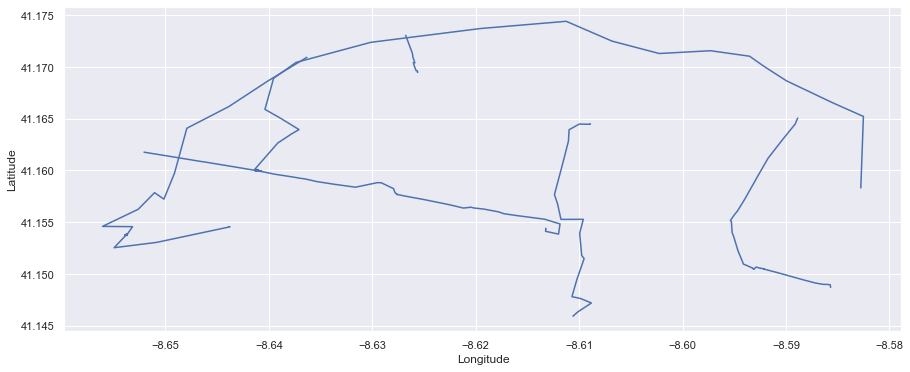

In [120]:
df.iloc[[101,127,90,74,86,91]].lines.plot(figsize=[15,15]);
plt.xlabel('Longitude')
plt.ylabel('Latitude');

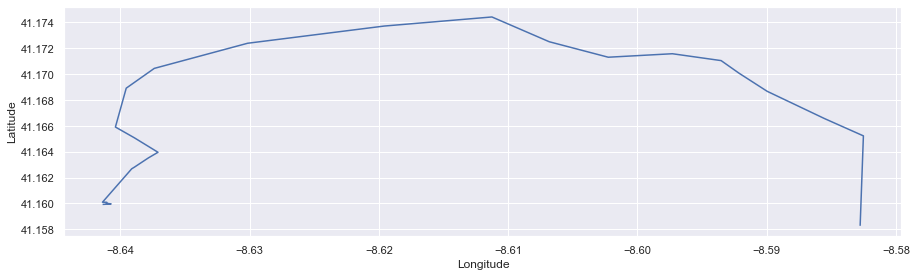

In [121]:
df.iloc[[101]].lines.plot(figsize=[15,15]);
plt.xlabel('Longitude')
plt.ylabel('Latitude');

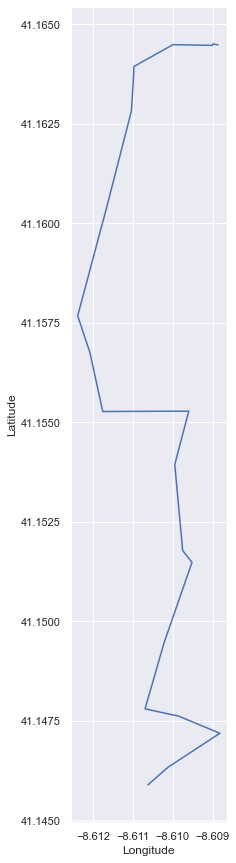

In [122]:
df.iloc[[127]].lines.plot(figsize=[15,15]);
plt.xlabel('Longitude')
plt.ylabel('Latitude');

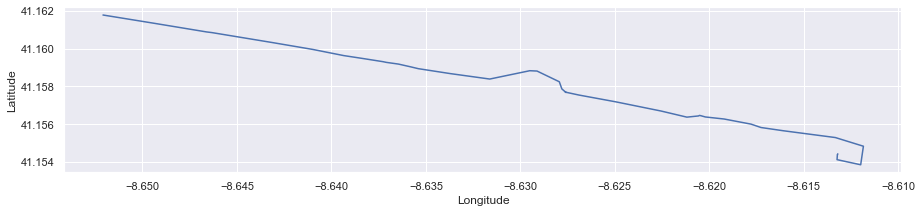

In [123]:
df.iloc[[90]].lines.plot(figsize=[15,15]);
plt.xlabel('Longitude')
plt.ylabel('Latitude');

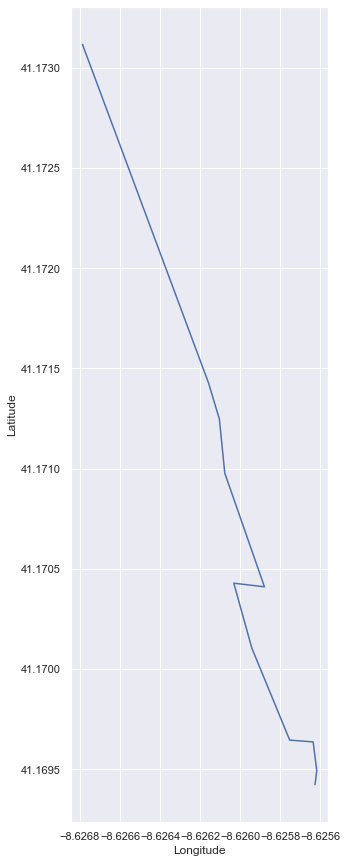

In [124]:
df.iloc[[74]].lines.plot(figsize=[15,15]);
plt.xlabel('Longitude')
plt.ylabel('Latitude');

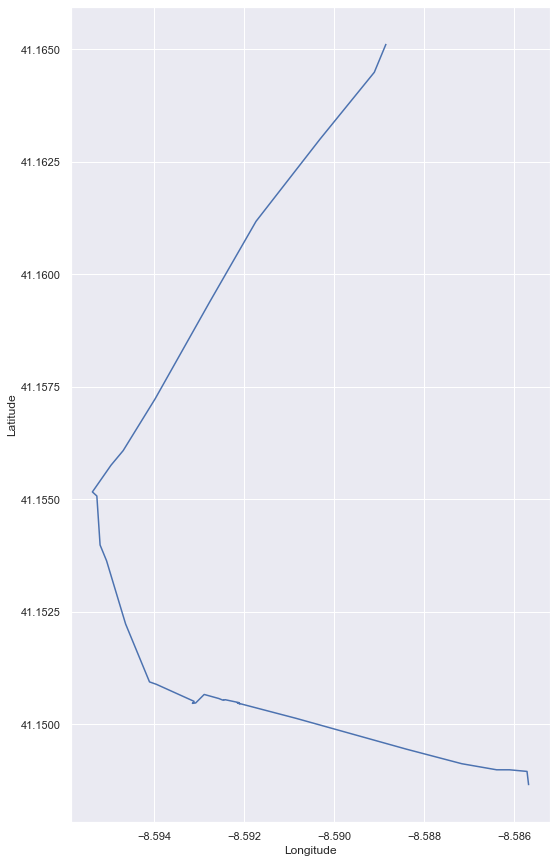

In [125]:
df.iloc[[86]].lines.plot(figsize=[15,15]);
plt.xlabel('Longitude')
plt.ylabel('Latitude');

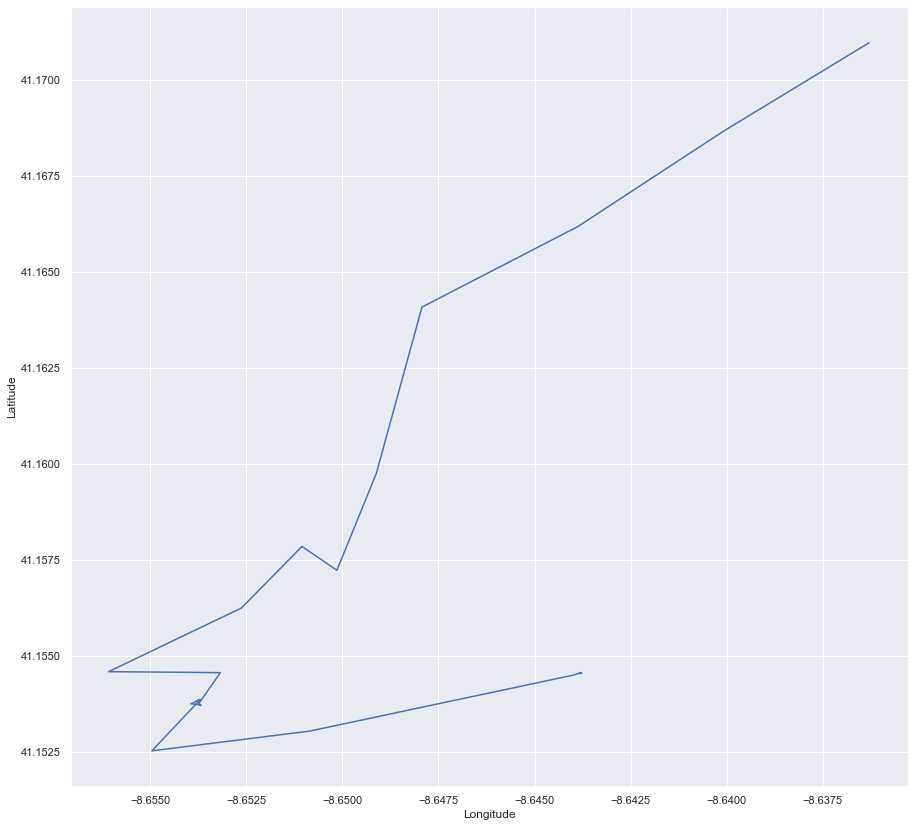

In [126]:
df.iloc[[91]].lines.plot(figsize=[15,15]);
plt.xlabel('Longitude')
plt.ylabel('Latitude');